***Todas as explicações e anotações estão presentes no README.md***

# 1. Importar as Dependências

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Pontos-chaves usando MP Holístico

In [2]:
mp_holistico = mp.solutions.holistic    # modelo holístico
mp_desenho = mp.solutions.drawing_utils # utilidade desenho

In [3]:
def deteccao_mediapipe(imagem, modelo):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # conversão de BGR para RGB
    imagem.flags.writeable = False                   # a imagem não é mais gravável
    resultados = modelo.process(imagem)              # fazer a predição
    imagem.flags.writeable = True                    # a imagem agora é gravável
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR) # conversão de RGB  para BGR
    return imagem, resultados

In [4]:
def desenhar_landmarks(imagem, resultados):
    # Desenhar as conexões do rosto
    mp_desenho.draw_landmarks(imagem, resultados.face_landmarks, mp_holistico.FACEMESH_CONTOURS,
                             mp_desenho.DrawingSpec(color=(80, 110 ,10), thickness=1, circle_radius=1),
                             mp_desenho.DrawingSpec(color=(80, 255, 121), thickness=1, circle_radius=1))
    
    # Desenhar as conexões do tronco
    mp_desenho.draw_landmarks(imagem, resultados.pose_landmarks, mp_holistico.POSE_CONNECTIONS,
                             mp_desenho.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                             mp_desenho.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    
    # Desenhar as conexões da mão esquerda
    mp_desenho.draw_landmarks(imagem, resultados.left_hand_landmarks, mp_holistico.HAND_CONNECTIONS,
                             mp_desenho.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                             mp_desenho.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    
    # Desenhar as conexões da mão direita
    mp_desenho.draw_landmarks(imagem, resultados.right_hand_landmarks, mp_holistico.HAND_CONNECTIONS,
                             mp_desenho.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_desenho.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

In [10]:
mp_holistico.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [5]:
# geralmente é o 0 o dispositivo padrão, mas tentar com outro valor caso não funcione
# pode até mesmo usar o nome do dispositivo de câmera acoplado, ver a documentação para esse caso
cap = cv2.VideoCapture(0)

# Iniciar o modelo mediapipe
with mp_holistico.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistico:
    while cap.isOpened():
        # Ler o que a câmera está captando
        ret, frame = cap.read()

        # Fazer as detecções
        imagem, resultados = deteccao_mediapipe(frame, holistico)
        
        # Desenhar landmarks
        # antes, usar a variável "frame" para verificar se a câmera está funcionando
        #depois de fazer a função "desenhar_landmarks", usar o a variável "imagem"
        desenhar_landmarks(imagem, resultados)

        # Mostrar na tela
        cv2.imshow('Tela OpenCV', imagem) # pode dar o nome que quiser para a tela que será mostrada

        # Encerrar o loop
        if cv2.waitKey(10) & 0XFF == ord('s'): # qualquer tecla pode ser usada para fechar a tela
            break
    cap.release()
    cv2.destroyAllWindows()

In [9]:
# Tipo de saída de "Resultados"
resultados

mediapipe.python.solution_base.SolutionOutputs

In [13]:
# Landmarks da face
resultados.face_landmarks.landmark

[x: 0.4719496965408325
y: 0.4417470097541809
z: -0.027515998110175133
, x: 0.4733518064022064
y: 0.3937388062477112
z: -0.04576898366212845
, x: 0.47172826528549194
y: 0.4102551341056824
z: -0.025279641151428223
, x: 0.4642065465450287
y: 0.3558894991874695
z: -0.03315605968236923
, x: 0.47332343459129333
y: 0.38075125217437744
z: -0.048090022057294846
, x: 0.47258687019348145
y: 0.36541542410850525
z: -0.04409674182534218
, x: 0.47009924054145813
y: 0.33078333735466003
z: -0.01937771402299404
, x: 0.4057692587375641
y: 0.3368605971336365
z: 0.009855102747678757
, x: 0.4689844846725464
y: 0.3081340193748474
z: -0.013095182366669178
, x: 0.4689231216907501
y: 0.29223084449768066
z: -0.014199863187968731
, x: 0.46759286522865295
y: 0.2302681803703308
z: -0.0011343875667080283
, x: 0.4719804525375366
y: 0.4482629895210266
z: -0.026544658467173576
, x: 0.471751868724823
y: 0.4530814290046692
z: -0.023723019286990166
, x: 0.4714187979698181
y: 0.4549087882041931
z: -0.01996675506234169
, x:

In [14]:
# Quantidade de landmarks da face
len(resultados.face_landmarks.landmark) # como exemplo, se precisar de todos; consultar a documentação

468

In [47]:
desenhar_landmarks(frame, resultados)

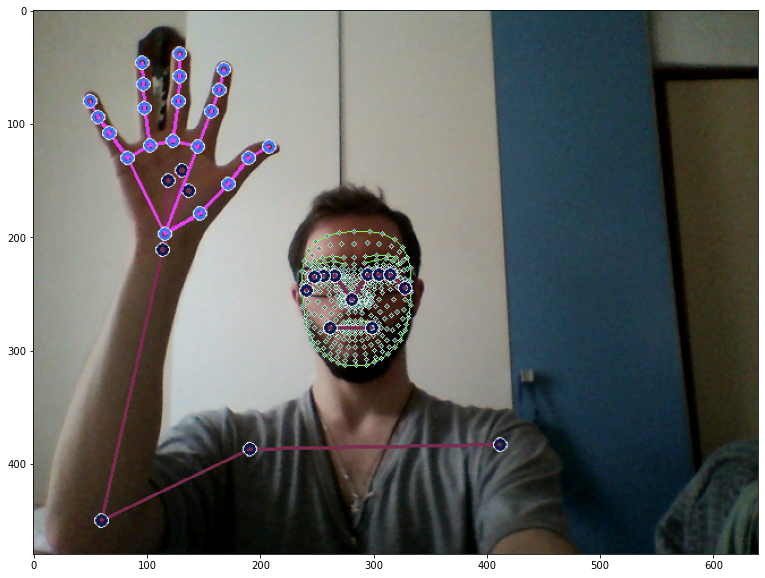

In [45]:
# Com óculos
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

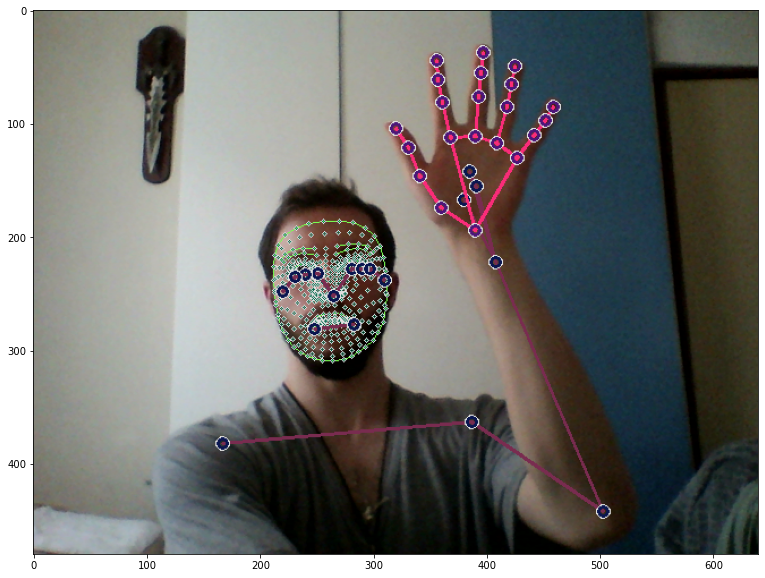

In [48]:
# Sem óculos
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extrair os Valores de Pontos-chaves

In [6]:
def extrair_pontos_chaves(resultados):
    # Condição para pose_landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in resultados.pose_landmarks.landmark]).flatten() if resultados.pose_landmarks else np.zeros(132)

    # Condição para face_landmarks
    rosto = np.array([[res.x, res.y, res.z] for res in resultados.face_landmarks.landmark]).flatten() if resultados.face_landmarks else np.zeros(1404)

    # Condição para left_hand_landmarks
    esquerda = np.array([[res.x, res.y, res.z] for res in resultados.left_hand_landmarks.landmark]).flatten() if resultados.left_hand_landmarks else np.zeros(63)


    # Condição para right_hand_landmarks
    direita = np.array([[res.x, res.y, res.z] for res in resultados.right_hand_landmarks.landmark]).flatten() if resultados.right_hand_landmarks else np.zeros(63)

    return np.concatenate([pose, rosto, esquerda, direita])

In [7]:
extrair_pontos_chaves(resultados).shape

(1662,)

In [8]:
extrair_pontos_chaves(resultados)

array([ 0.45670468,  0.42991248, -0.89492434, ...,  0.        ,
        0.        ,  0.        ])

# 4. Configurar as Pastas para a Coleção de Arrays

In [9]:
# Caminho para exportar os dados, arrays NumPy
CAMINHO_DADOS = os.path.join('Dados_MP')

# Ações que queremos que sejam detecdadas
acoes = np.array(['ola', 'obrigado', 'amo voce'])

# Quantidade de sequências de vídeos que queremos capturar
num_videos = 30

# Quantidade de frames capturadas
num_frames = 30

In [12]:
for acao in acoes:
    for video in range(num_videos):
        # bloco "try" usado para impedir de criar a pasta se já existir
        try:
            os.makedirs(os.path.join(CAMINHO_DADOS, acao, str(video)))
        except:
            pass

# 5. Coletar os Valores de Pontos-chaves para Treino e Teste

**01:13:00**

In [ ]:
# Definir a câmera a ser usada
cap = cv2.VideoCapture(0)

# Iniciar o modelo mediapipe
with mp_holistico.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistico:
    
    # Loop através de cada ação
    for acao in acoes:
        # Loop atrvés de cada vídeo
        for video in range(num_videos):
            # Loop através de cada frame
            for frame_num in range(num_frames):
    
                # Ler o que a câmera está captando
                ret, frame = cap.read()

                # Fazer as detecções
                imagem, resultados = deteccao_mediapipe(frame, holistico)

                # Desenhar landmarks
                desenhar_landmarks(imagem, resultados)
                
                # Aplicar a lógica de espera
                if frame_num == 0:
                    cv2.putText(imagem, 'COMEÇANDO A COLETA', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(imagem, f'COLETANDO FRAMES PARA {acao}. VÍDEO Nº {video}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(imagem, f'COLETANDO FRAMES PARA {acao}. VÍDEO Nº {video}', (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)

                # Mostrar na tela
                cv2.imshow('Tela OpenCV', imagem)

        # Encerrar o loop
        if cv2.waitKey(10) & 0XFF == ord('s'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 6. Processar os Dados e Criar Rótulos e Recursos

# 7. Construir e Treinar a Rede Neural LSTM

# 8. Fazer Predições

# 9. Salvar os Pesos

# 10. Avaliar Usando a Matriz de Confusão e Acurácia

# 11. Testar em tempo real